In [54]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf, msd # diffusion
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
import pwlf

In [55]:
malodour = "MBA"
polymer = "PET"
solvent = "SOL"
path = f"/home/nkarthi/classes/IFF_fiber_wetting/ligpargen_output/single_PET_with_{malodour}"
# path = f"/home/nkarthi/classes/IFF_fiber_wetting/ligpargen_output/polypargen"

# Import `xvg`

In [56]:
f = open(path + "/msd.xvg", 'r')
text = f.readlines()
f.close

<function TextIOWrapper.close()>

In [57]:
data = []

for ls in text:
    curr_ls = ls.split()
    try:
        float(curr_ls[0])
        data.append(curr_ls)
    except:
        continue

data = np.array(data).astype(float)

In [58]:
tau = data[:, 0]
mal = data[:, 1]
poly = data[:, 2]
sol = data[:, 3]

idxs = np.isfinite(np.log10(tau))

tau = np.log10(tau[idxs])
mal = np.log10(mal[idxs])
poly = np.log10(poly[idxs])
sol = np.log10(sol[idxs])

/tmp/ipykernel_869/3578021185.py:6: RuntimeWarning: divide by zero encountered in log10
  idxs = np.isfinite(np.log10(tau))


In [59]:
nseg = 2

msd = mal 
# msd = poly
# msd = sol

my_pwlf = pwlf.PiecewiseLinFit(tau, msd, seed = 1234)
res = my_pwlf.fit(nseg)
xHat = np.linspace(min(tau), max(tau), num=10000)
yHat = my_pwlf.predict(xHat)
breaks = my_pwlf.fit_breaks
slopes = my_pwlf.slopes
print(slopes)

[0.76596219 0.88575807]


[0.76596219 0.88575807]
[0.78452825 0.77628566]
[0.97460629 0.98043186]


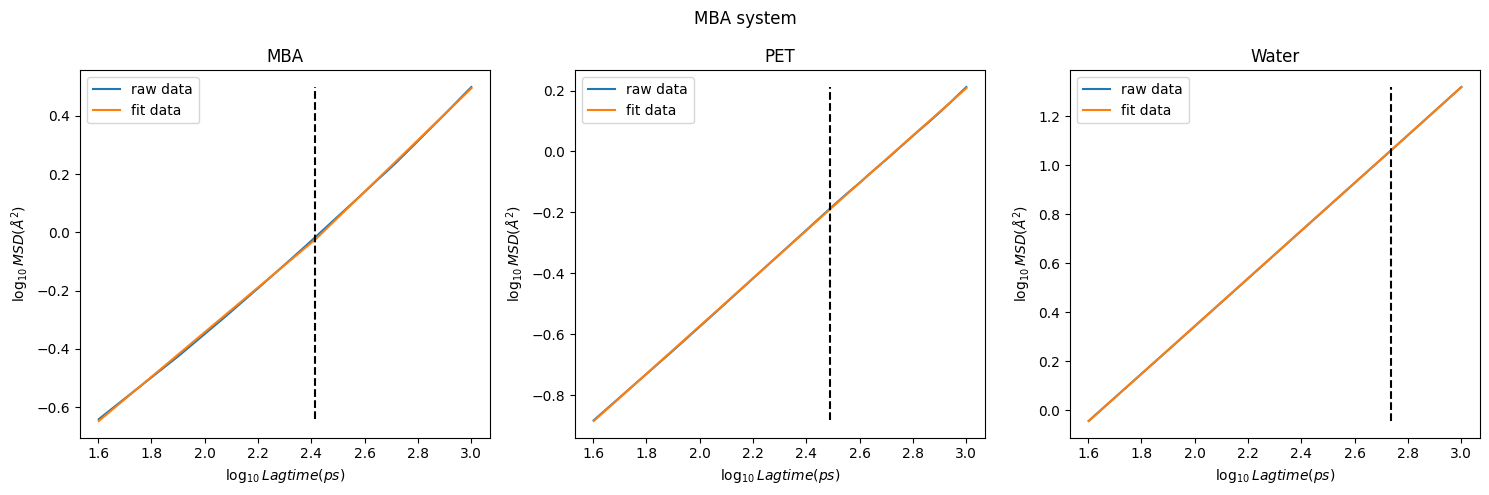

In [60]:
sz = 5
ar = 1
nseg = 2
fig, axs = plt.subplots(1, 3, figsize = (sz*ar*3, sz))

atoms = [mal, poly, sol]
labels = [malodour, "PET", "Water"]

for i in range(3):
    ax = axs[i]
    atom = atoms[i]
    my_pwlf = pwlf.PiecewiseLinFit(tau, atom, seed = 1234)
    res = my_pwlf.fit(nseg)
    xHat = np.linspace(min(tau), max(tau), num=10000)
    yHat = my_pwlf.predict(xHat)
    breaks = my_pwlf.fit_breaks
    slopes = my_pwlf.slopes
    print(slopes)

    ax.plot(tau, atom, label = "raw data")
    ax.plot(xHat, yHat, label = "fit data")

    ax.plot([breaks[1], breaks[1]], [atom.min(), atom.max()], 'k--')
    ax.set_xlabel(r"$\log_{10}{Lag time(ps)}$")
    ax.set_ylabel(r"$\log_{10}{MSD (\AA^2)}$")
    ax.legend()
    ax.set_title(labels[i])

fig.suptitle(f"{malodour} system")
fig.tight_layout()
fig.savefig(f"{malodour}_fit_msd.png", dpi = 300)

In [45]:
MSD_log = "{0:10s} {1:3f} {2:3f}\n"

# str_out = "MSD fit break points and exponents\n"
str_out = "{0:^10s} {1:^6s} {2:^10s}\n".format("Segment", "break", 'slope')

for i in range(nseg):
    col1 = f"Segment {i + 1}"
    col2 = breaks[i + 1]
    col3 = slopes[i]
    str_out += MSD_log.format(col1, col2, col3)

f = open(f'{malodour}_MSD-log.txt', 'w')
f.write(str_out)
f.close()

# Data import

In [56]:
u = mda.Universe(path + "/md_1.gro", path + '/md_1.trr')

In [50]:
mal_atoms = u.select_atoms(f"resname {malodour}")
pol_atoms = u.select_atoms(f"resname {polymer}")
sol_atoms = u.select_atoms(f"resname {solvent}")

## MSD

In [51]:
msd_analysis_mal = msd.EinsteinMSD(u, select = f"resname {malodour}")
msd_analysis_pol = msd.EinsteinMSD(u, select = f"resname {polymer}")
# msd_analysis = msd.EinsteinMSD(u, select = "all")
msd_analysis_mal.run()
msd_analysis_pol.run()

100%|██████████| 1250/1250 [00:00<00:00, 7228.27it/s]


In [52]:
x = msd_analysis_mal.times # in ps
y = msd_analysis_mal.results['timeseries'] # Angstrom

x2 = msd_analysis_pol.times # in ps
y2 = msd_analysis_pol.results['timeseries'] # Angstrom

idxs = np.isfinite(np.log10(x))
x = np.log10(x[idxs])
y = np.log10(y[idxs])

idxs = np.isfinite(np.log10(x2))
x2 = np.log10(x2[idxs])
y2 = np.log10(y2[idxs])

# nseg = 4
# my_pwlf = pwlf.PiecewiseLinFit(x, y, seed = 1234)
# res = my_pwlf.fit(nseg)
# xHat = np.linspace(min(x), max(x), num=10000)
# yHat = my_pwlf.predict(xHat)
# breaks = my_pwlf.fit_breaks
# slopes = my_pwlf.slopes

/tmp/ipykernel_42037/4213664807.py:7: RuntimeWarning: divide by zero encountered in log10
  idxs = np.isfinite(np.log10(x))
/tmp/ipykernel_42037/4213664807.py:11: RuntimeWarning: divide by zero encountered in log10
  idxs = np.isfinite(np.log10(x2))


In [53]:
MSD_log = "{0:10s} {1:3f} {2:3f}\n"

# str_out = "MSD fit break points and exponents\n"
str_out = "{0:^10s} {1:^6s} {2:^10s}\n".format("Segment", "break", 'slope')

for i in range(nseg):
    col1 = f"Segment {i + 1}"
    col2 = breaks[i + 1]
    col3 = slopes[i]
    str_out += MSD_log.format(col1, col2, col3)

f = open(path + '/processed_MSD-log.txt', 'w')
f.write(str_out)
f.close()

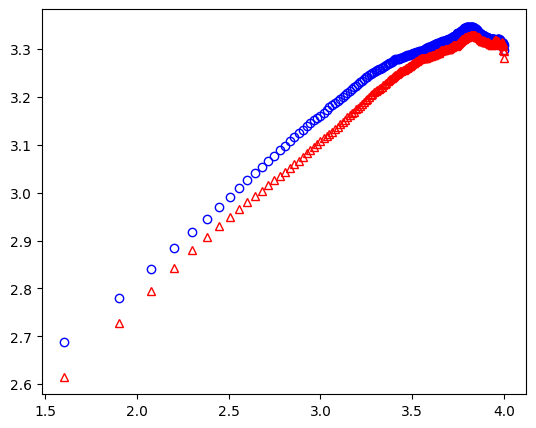

In [54]:
sz = 5
ar = 1.25

fig, ax = plt.subplots(1, 1, figsize = (sz*ar, sz))
ax.plot(x, y, "o", markerfacecolor = 'None', color = 'blue', label = 'Raw data')
ax.plot(x2, y2, "^", markerfacecolor = 'None', color = 'red', label = 'Raw data')

# ax.plot(xHat, yHat, linestyle = '-', color = 'red', lw = 2, label = 'fit data')

# for i in range(1, len(breaks) - 1):
#     ax.plot([breaks[i], breaks[i]], [y.min(), y.max()], 'k--', lw = 1)
#     # ax.text((breaks[i] - breaks[i - 1])/2 + breaks[i - 1], 3, f"a = {slopes[i - 1]:.3f}")

# ax.set_xlabel(r"$\log_{10}{Time (ps)}$")
# ax.set_ylabel(r"$\log_{10}{ MSD (\AA) }$")
# ax.legend(loc = 'upper left')
# fig.savefig(path + "/processed_MSD.svg")